# Convolutional Neural Network
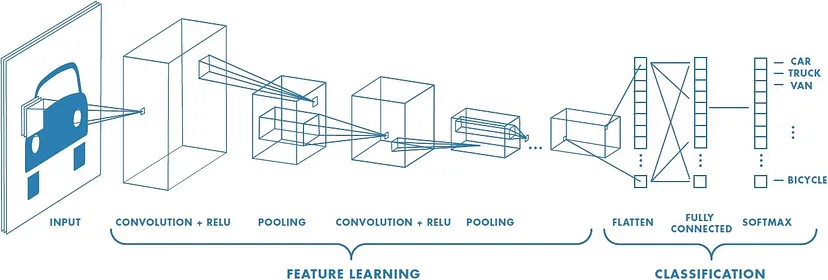

**Convolutional Neural Network**: an algorithm that usually takes image as input and classifies it to a category. And it is **much faster compared to the fully connected neural network** such as **ANN**. It has three types of layers in this network: **Convolution Layer, Pooling Layer, and Fully Connected Layers**.

**Note:** since image is usually made up of RGB, then the input image is usually **size x size x 3** sized while the number 3 is usually called the **channels.**

### Convolutional Layer

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GcI7G-JLAQiEoCON7xFbhg.gif')

The major role of this layer is to **extract high-level features** such as edges from input image and **kernel (or filter)** is the key point in achieving this goal. In detail, each kernel is **$n$ x $n$ x channels** sized and kernel is **basically obtaining possible features from each channel** by **mapping a matrix** onto the image.<br>
Let's considering a simple example where kernel size is 3x3 on only on channel as shown above, from image, we could see that the **kernel would scan through entire image to search for certain feature** and the resulted feature will be **calcuated by the total of each value in kernel multiply the corresponding value in the image** (this process called **convolution**). Note that this kernel is scanning through the image by **shifting only 1 unit** from the current scan to the next scan and this is denoted by the **stride**(stride=1 in this case). The final result will be a **feature map** which is a **collection of convolved features** (this feature map will have **channel size of number of kernels used** in this layer).

***In normal cases, this final result will be the sum of each kernel channel.***

In [ ]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ciDgQEjViWLnCbmX-EeSrA.gif')

**Note**: in above case, **there will be situations that the part of image will not fulfill the entire kernel** (e.g. when kernel and stride is set to be not precisely end at the edge of image). To deal with this, we use the technique called **Padding** in which the **part of kernel that is not fit on the image will be automatically fulfilled with 0 by default**.

### Pooling Layer


In [ ]:
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*uoWYsCV5vBU8SHFPAPao-w.gif')

After getting the feature map, similar to the Convolutional Layer, this layer is responsible for **reducing the spatial size of the Convolved Feature** and it also helps **lower the computational power** required to process the data through **dimensionality reduction**. Beyond this, it is useful for **extracting dominant features**, thus maintaining the process of effectively training the model.

To do so, similiar to kernel, there is a **pool** (**$n$ x $n$ size**) that scans through the entire convoled feature. Instead of mapping a matrix onto the feature map, it will **select a region of specified size starting from the right corner** and **compute a value of that region by following some rubric**; thus, the resulted pooled matrix will passed to the next layer. <br>
There are two types of poolings:
*   **Max Pooling**: return the **maximum** value of the selected region
*   **Average Pooling**: return the **average** value of the selected region
<br>

***Note: Max Pooling is usually better than Average Pooling because it can remove noises.***


### Fully Connected Layer

It will be the **normal feed-forward neural network** in which the **input will be the flatten of the image** (image matrix will be converted into a **column vector**). And after training, a **loss** will be calculated and **the values of weights and biases in the layers will be updated** through a process called **back propagation** (More explained in ANN). And this repeats until a certain numer of **epochs**.

**Note**: **the values in kernel will also be updated as we can simply treat it as a weight while nodes will be only connected to certain nodes in the next layer.**

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./Cat_Dog_data/train', target_size=(64,64), batch_size=32, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('./Cat_Dog_data/test/', target_size=(64,64), batch_size=32, class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
704/704 [==============================] - 123s 173ms/step - loss: 0.5890 - accuracy: 0.6779 - val_loss: 0.5083 - val_accuracy: 0.7604
Epoch 2/10
704/704 [==============================] - 120s 170ms/step - loss: 0.4828 - accuracy: 0.7647 - val_loss: 0.4716 - val_accuracy: 0.7832
Epoch 3/10
704/704 [==============================] - 119s 169ms/step - loss: 0.4365 - accuracy: 0.7965 - val_loss: 0.4542 - val_accuracy: 0.7900
Epoch 4/10
704/704 [==============================] - 120s 170ms/step - loss: 0.4019 - accuracy: 0.8189 - val_loss: 0.4525 - val_accuracy: 0.7904
Epoch 5/10
704/704 [==============================] - 120s 171ms/step - loss: 0.3630 - accuracy: 0.8350 - val_loss: 0.4513 - val_accuracy: 0.7988
Epoch 6/10
704/704 [==============================] - 115s 163ms/step - loss: 0.3262 - accuracy: 0.8550 - val_loss: 0.5093 - val_accuracy: 0.7756
Epoch 7/10
704/704 [==============================] - 114s 162ms/step - loss: 0.2839 - accuracy: 0.8796 - val_loss: 0.4386 -